In [1]:
import numpy as np
import matplotlib.pyplot as plt

from HebbNet import *

In [2]:
def build_net():
    net = HebbNet()
    for k in range(10):
        net.add_neuron()
    for i in range(1, 11):
        for j in range(1, 11):
            net.connect_neurons(i, j)
    return net

def generate_input(iterations):
    input_list = []
    for i in range(iterations):
        if np.random.rand() < .5:
            input_list.append(2)
            input_list.append(3)
        else:
            num = np.random.randint(0, 8)
            if num > 1:
                num += 2
            input_list.append(num)
    return input_list

def one_hot(ind, size):
    vec = [0] * size
    vec[ind] = 1
    return vec

def process_input(net, input_list, memory1=.5, memory2=.2, firing_count=1):
    for num in input_list:
        for _ in range(firing_count):
            net.fire_neurons(memory1)
        net.new_inputs(one_hot(num, 10), memory2)

In [3]:
net = build_net()
input_list = generate_input(2000)
process_input(net, input_list)

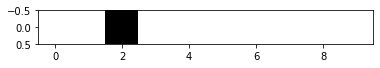

In [4]:
net.new_inputs(one_hot(2, 10), 0)
for _ in range(10):
    net.fire_neurons(.5)
plt.imshow([net.get_encoding()], cmap='gray_r')

In [5]:
net.get_encoding()*1000

array([3.62151071e-05, 2.61376224e-04, 1.15208360e+00, 3.20319161e-07,
       2.49653845e-06, 1.21047222e-07, 2.28363741e-08, 6.39486462e-05,
       8.09637730e-10, 2.77547263e-07])